In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import scipy.stats as st
import seaborn as sns

from experiment.v1dd_client import V1DDClient
from experiment.v1dd_ophys_session import V1DDOPhysSession
from stimulus_analysis.drifting_gratings import DriftingGratings
import analysis_tools as at

%load_ext autoreload
%autoreload 2

In [2]:
# windows
# base_folder = r"\\allen\programs\mindscope\workgroups\surround\v1dd_in_vivo_new_segmentation\data"

# # linux and mac
# base_folder = "/allen/programs/mindscope/workgroups/surround/v1dd_in_vivo_new_segmentation/data"
# base_folder = "/Volumes/programs/mindscope/workgroups/surround/v1dd_in_vivo_new_segmentation/data"
base_folder = "/Users/chase/Desktop/test_v1dd_data"
# base_folder = "/Volumes/AllenDrive/v1dd/data" # Chase's external hard drive
client = V1DDClient(base_folder)

In [3]:
mouse = 409828
col, vol = 1, 3
sess = client.load_ophys_session(mouse=mouse, column=col, volume=vol)
# Alternatively
# sess = client.load_ophys_session(session_id="M409828_13")
print(f"Loaded ophys session {sess.get_session_id()} (mouse {sess.get_mouse_id()}, column {sess.get_column_id()}, volume {sess.get_volume_id()})")

Loaded ophys session M409828_13 (mouse 409828, column 1, volume 3)


In [4]:
plane = sess.get_planes()[0]
print(f"Analyzing plane {plane}")
dgw = DriftingGratings(sess, plane, dg_type="windowed")
dgf = DriftingGratings(sess, plane, dg_type="full")

Analyzing plane 1


In [5]:
dgwm = dgw.metrics.loc[dgw.metrics.is_valid]
dgwm.head(10)

Loading DG-windowed response metrics for session M409828_13, plane 1...


,pref_response,pref_dir,pref_sf,pref_dir_idx,pref_sf_idx,pref_dir_mean,z_score,response_p,osi,gosi,...,p_trial_responses,sig_trial_responses,norm_dir_responses,is_valid,pref_ori,chisq_response_p,null_dist_multi_mean,null_dist_multi_std,null_dist_single_mean,null_dist_single_std
0,0.001336,90,0.04,3,0,26.679055,3.862563,0.0001,0.404287,0.09386,...,0.087029,False,"[0.25015017, 0.6512396, -0.04599632, 0.9891021...",True,90,0.114,0.000435,0.000233,0.000427,0.000652
1,0.001739,0,0.04,0,0,0.070415,3.887575,0.0002,0.636135,0.155637,...,0.323011,False,"[1.8923771, 0.86688083, 0.99304307, 0.22574292...",True,0,0.322,0.000569,0.000301,0.00057,0.00085
2,0.000889,210,0.08,7,1,275.243489,-0.140095,0.5193,0.415835,0.199779,...,0.911716,False,"[-0.24663812, -0.47465464, -0.4078789, -0.4806...",True,30,0.903,0.000959,0.000496,0.000967,0.001413
3,0.00166,120,0.04,4,0,117.169741,1.97814,0.0426,0.620734,0.265674,...,0.422266,False,"[0.13654612, -0.29972097, 0.076660596, -0.1823...",True,120,0.441,0.000769,0.00045,0.000763,0.001284
4,0.001459,90,0.04,3,0,133.524609,0.93866,0.1583,0.189591,0.02125,...,0.583763,False,"[1.6056216, 1.1354958, 0.77980757, 2.2687705, ...",True,90,0.544,0.000891,0.000605,0.000867,0.001668
5,0.001078,120,0.08,4,1,137.099368,1.660403,0.0601,0.574286,0.233856,...,0.15469,False,"[-0.772649, -0.670156, -0.52175933, -0.772649,...",True,120,0.173,0.000565,0.000309,0.000571,0.000881
6,0.04379,0,0.08,0,1,349.161004,160.555302,0.0,0.993159,0.786891,...,0.0,True,"[8.300041, 0.7324047, 0.00484052, -0.007601554...",True,0,0.0,0.000462,0.00027,0.000462,0.000757
7,0.001729,30,0.04,1,0,42.881459,0.937805,0.1335,0.343454,0.205463,...,0.329829,False,"[-0.3773661, 0.73485804, 0.5509135, 0.31599998...",True,30,0.315,0.000939,0.000843,0.000951,0.002411
8,0.006387,180,0.08,6,1,200.53603,1.924607,0.0523,0.925481,0.533833,...,0.036355,True,"[-0.59482896, -0.7628895, -0.76820856, -0.7031...",True,0,0.056,0.002473,0.002033,0.002571,0.005916
9,0.006793,240,0.08,8,1,239.145525,10.948001,0.0,0.912764,0.505968,...,0.139301,False,"[-0.27377403, -0.27377403, -0.21082923, -0.105...",True,60,0.111,0.000531,0.000572,0.000553,0.001714


(0.0, 360.0)

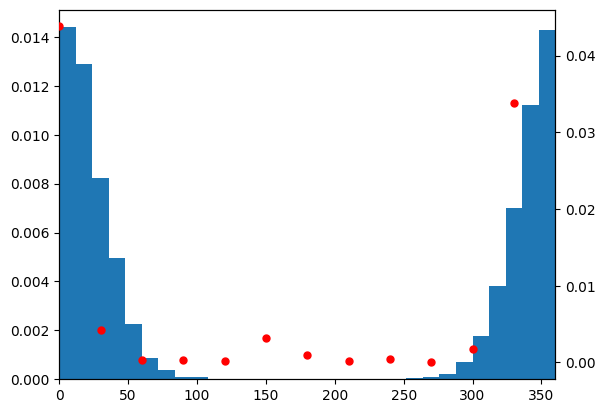

In [6]:
roi = 6
pref_sf_idx = dgwm.at[roi, "pref_sf_idx"]
x = dgw.dir_list
y = [dgw.get_mean_response(roi, dir_idx, pref_sf_idx) for dir_idx in range(len(dgw.dir_list))]
mu_deg = 55
kappa = 5
dist_rad = np.random.vonmises(mu=np.deg2rad(mu_deg)-180, kappa=kappa, size=10000)

plt.hist(np.rad2deg(dist_rad)+180, bins=30, density=True)
plt.twinx().scatter(x, y, color="red", s=25, zorder=10)
plt.xlim(0, 360)

In [8]:
dgwm.index[dgwm.is_responsive][:50]

Int64Index([ 0,  1,  6,  8,  9, 10, 14, 16, 17, 19, 22, 24, 26, 27, 29, 30, 32,
            33, 34, 35, 39, 41, 43, 44, 45, 46, 47, 48, 49, 52, 53, 56, 57, 58,
            61, 64, 66, 67, 68, 69, 70, 71, 72, 73, 74, 77, 79, 81, 82, 85],
           dtype='int64')

In [7]:
def relative_dir(dirs, offset):
    x = []
    
    for i, d in enumerate(dirs):
        d -= offset
        if d <= -180:
            d += 360
        elif d > 180:
            d -= 360
        x.append((d, i))
    
    x.sort(key=lambda item: item[0])
    new_dirs = [item[0] for item in x]
    idx = [item[1] for item in x]
    return new_dirs, idx

relative_dir(dgw.dir_list, 180)

([-150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150, 180],
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0])

In [ ]:
dgwm.index[dgwm.is_responsive][:40]

Int64Index([ 0,  1,  6,  8,  9, 10, 14, 16, 17, 18, 19, 22, 24, 26, 27, 29, 30,
            32, 33, 34, 35, 37, 39, 41, 43, 44, 45, 46, 47, 48, 49, 52, 53, 56,
            57, 58, 61, 62, 64, 66],
           dtype='int64')

<AxesSubplot:title={'center':'DG-windowed trial responses'}, xlabel='Direction (°)', ylabel='Mean event response to trial'>

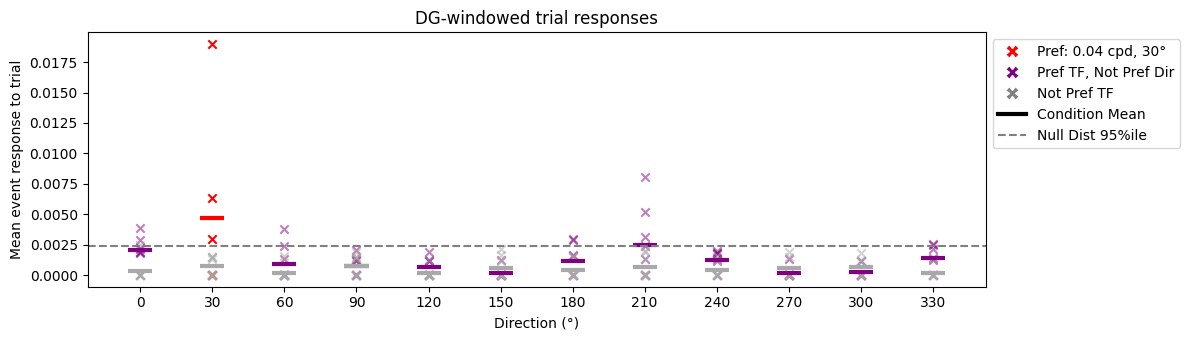

In [14]:
dgw.plot_trial_responses(roi=41)

pref_response               0.004711
pref_dir                        30.0
pref_sf                         0.04
pref_dir_idx                     1.0
pref_sf_idx                      0.0
pref_dir_mean             346.813215
pref_sf_mean                    0.04
z_score                    13.507578
response_p                       0.0
osi                         0.813509
gosi                        0.491467
dsi                         0.304236
frac_responsive_trials           0.5
lifetime_sparseness          0.81305
p_trial_responses           0.000553
sig_trial_responses              1.0
is_valid                         1.0
pref_ori                        30.0
chisq_response_p               0.014
Name: 41, dtype: Float64

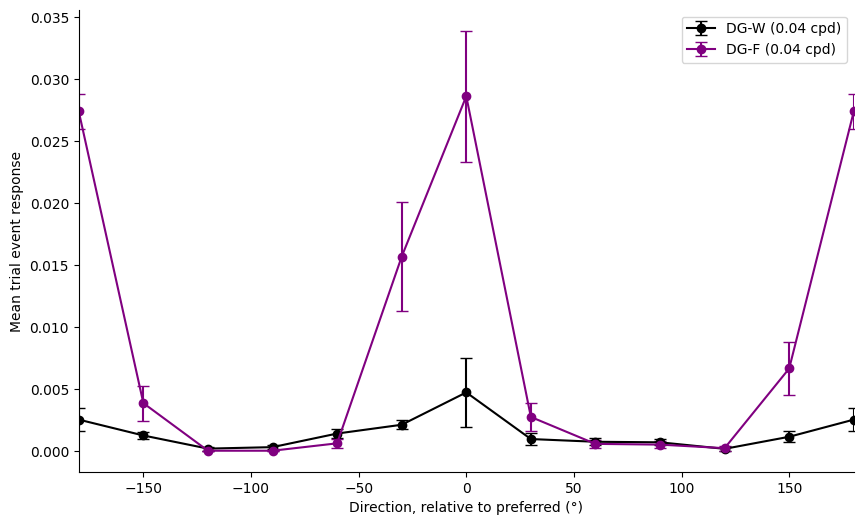

In [15]:
roi = 41
# roi = 43
pref_sf_idx = dgwm.at[roi, "pref_sf_idx"]
pref_dir = dgwm.at[roi, "pref_dir"]
x, idx = relative_dir(dgw.dir_list, pref_dir)
# x = dgw.dir_list
y_w = []
yerr_w = []
y_f = []
yerr_f = []

for dir_idx in idx:
# for dir_idx in range(len(x)):
    r, err = dgw.get_mean_response(roi, dir_idx, pref_sf_idx, return_error=True)
    y_w.append(r)
    yerr_w.append(err)

    r, err = dgf.get_mean_response(roi, dir_idx, pref_sf_idx, return_error=True)
    y_f.append(r)
    yerr_f.append(err)

x.insert(0, -x[-1])
y_w.insert(0, y_w[-1])
yerr_w.insert(0, yerr_w[-1])
y_f.insert(0, y_f[-1])
yerr_f.insert(0, yerr_f[-1])

fig, ax = plt.subplots(figsize=(10, 6), facecolor="white")
ax.errorbar(x, y_w, yerr_w, color="black", marker="o", capsize=4, label=f"DG-W ({dgw.sf_list[pref_sf_idx]:.2} cpd)")
ax.errorbar(x, y_f, yerr_f, color="purple", marker="o", capsize=4, label=f"DG-F ({dgw.sf_list[pref_sf_idx]:.2} cpd)")
ax.set_xlim(-180, 180)
ax.set_xlabel("Direction, relative to preferred (°)")
ax.set_ylabel("Mean trial event response")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.legend()

dgwm.loc[roi]

[2.98721218e-10 1.75799416e+01 2.06508037e+02 1.63300678e-03]
[4.65940743e-01 3.10127360e-07 1.14898729e+01 2.09277995e+02
 3.06100681e-09 1.56214444e+01 1.80000000e+02 1.00000000e+00]


Text(0.5, 1.0, 'ROI 19 in (M409828, C1, V3, P1), dgw-dsi=0.1729, dgw-osi=0.9534')

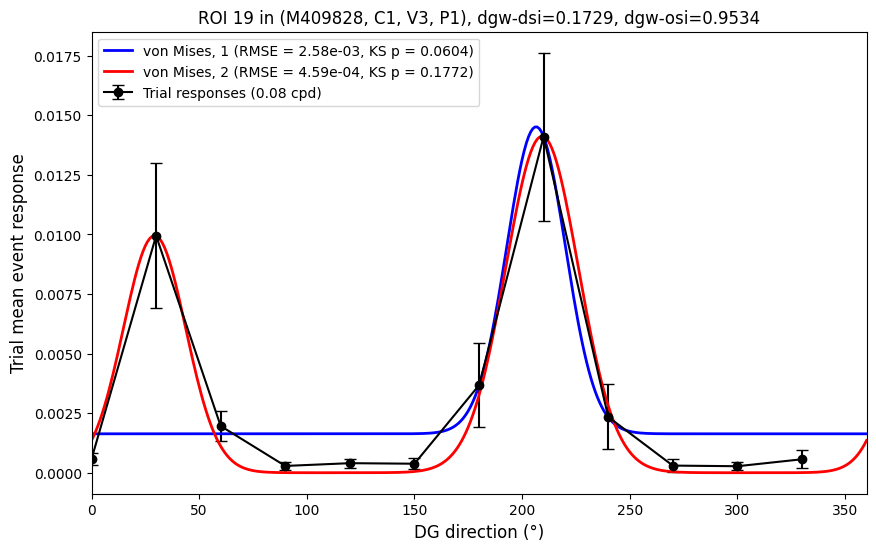

In [30]:
def f_vonmises(x, scale, k, x0, b):
    return scale * np.exp(k * np.cos((np.deg2rad(x - x0)))) + b

f_vonmises_bounds = (
    (0,      0,   0,   0), # lower bounds
    (np.inf, np.inf, 360, np.inf) # upper bounds
    # scale    k     x0
)

def f_vonmises_2(x, alpha, scale_1, k_1, x0_1, scale_2, k_2, x0_2, b):
    # return alpha*scale_1*np.exp(k_1 * np.cos((np.deg2rad(x - x0_1)))) + (1-alpha)*scale_2*np.exp(k_2 * np.cos((np.deg2rad(x - x0_2)))) + b
    return alpha*scale_1*np.exp(k_1 * np.cos((np.deg2rad(x - x0_1)))) + (1-alpha)*scale_2*np.exp(k_2 * np.cos((np.deg2rad(x - x0_1 - 180))))
    # return scale_1*np.exp(k_1 * np.cos((np.deg2rad(2*(x - x0_1)))))

f_vonmises_2_bounds = (
    (0.01, 0,      0,      0,   0,      0,      0,  0), # lower bounds
    (0.99, np.inf, np.inf, 360, np.inf, np.inf, 360, np.inf) # upper bounds
    # a,    s_1     k_1   x0_1   s_2    k_2    x0_2
)

roi = 19 # 2 peaks
# roi = 64 # 1 peak
# roi = 14 # 1 peak
# roi = 10 # idk, but VM-2 fit makes k_1 really small
# roi = 81 # bad VM2 fit
# roi = 41
# roi = 43
# roi = 44
# roi = 84
pref_sf_idx = dgwm.at[roi, "pref_sf_idx"]
pref_dir = dgwm.at[roi, "pref_dir"]
x = dgw.dir_list
# x = relative_dir(dgw.dir_list, pref_dir)
y = []
y_err = []

for dir_idx in range(len(dgw.dir_list)):
    mu, err = dgw.get_mean_response(roi, dir_idx, pref_sf_idx, return_error=True)
    y.append(mu)
    y_err.append(err)

opt_params_1, est_cov_1 = scipy.optimize.curve_fit(f_vonmises, x, y, maxfev=20000, bounds=f_vonmises_bounds)
opt_params_2, est_cov_2 = scipy.optimize.curve_fit(f_vonmises_2, x, y, maxfev=20000, bounds=f_vonmises_2_bounds) # , p0=(0.5, 1, 1, 0, 1, 1, 180)

print(opt_params_1)
print(opt_params_2)
# print(opt_params)
# print(est_cov)
y_pred_1 = f_vonmises(x, *opt_params_1)
y_pred_2 = f_vonmises_2(x, *opt_params_2)
rmse_1 = np.sqrt(np.mean(np.square(y_pred_1 - y)))
rmse_2 = np.sqrt(np.mean(np.square(y_pred_2 - y)))
# _, p_1 = st.ks_2samp(y_pred_1, y)
# _, p_2 = st.ks_2samp(y_pred_2, y)
p_1 = st.cramervonmises_2samp(y_pred_1, y).pvalue
p_2 = st.cramervonmises_2samp(y_pred_2, y).pvalue

fig, ax = plt.subplots(figsize=(10, 6), facecolor="white")
ax.errorbar(x, y, yerr=y_err, color="black", marker="o", capsize=4, label=f"Trial responses ({dgw.sf_list[pref_sf_idx]:.2} cpd)")
xx = np.arange(0, 361)
ax.plot(xx, f_vonmises(xx, *opt_params_1), color="blue", linewidth=2, label=f"von Mises, 1 (RMSE = {rmse_1:.2e}, KS p = {p_1:.4f})")
ax.plot(xx, f_vonmises_2(xx, *opt_params_2), color="red", linewidth=2, label=f"von Mises, 2 (RMSE = {rmse_2:.2e}, KS p = {p_2:.4f})")
ax.set_xlim(xx.min(), xx.max())
ax.legend(fontsize=10)
ax.set_xlabel("DG direction (°)", fontsize=12)
ax.set_ylabel("Trial mean event response", fontsize=12)
dgw_dsi = dgw.metrics.loc[roi, "dsi"]
dgw_osi = dgw.metrics.loc[roi, "osi"]
ax.set_title(f"ROI {roi} in {'(M{}, C{}, V{}, P{})'.format(*sess.get_mouse_column_volume(), plane)}, dgw-dsi={dgw_dsi:.4f}, dgw-osi={dgw_osi:.4f}")

In [31]:
st.pearsonr(y_pred_1, y)[0] ** 2, st.pearsonr(y_pred_2, y)[0] ** 2

(0.6377601661562418, 0.9909401029931127)

In [13]:
dgw.metrics.loc[14, "dsi_naive"]

0.9506321549415588